In [1]:
# LSTM for weather forecasting and time series implementation with regression framing
import copy
from concurrent.futures import ProcessPoolExecutor
from datetime import datetime, timedelta
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from statistics import mean 
import time
import seaborn as sns
import sys
script_path = os.path.abspath("pyscripts")
if script_path not in sys.path:
    sys.path.append(script_path)
from utils import *

In [2]:
folderpath = '/amethyst/s0/fbx5002/geolab_storage_V3/data/IoT_Temp/Geotab_processed_NYC/'
stationpath = folderpath +'uniqueNodes.csv'
stations = pd.read_csv(stationpath)
display(stations.head(5))

station_ids = stations['Geohash']
print(len(station_ids))

,Unnamed: 0,Geohash,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE
0,0,dr5rgb7,40.73868,-74.01077,40.74005,-74.00940
1,1,dr72jhj,40.80322,-73.95309,40.80460,-73.95172
2,2,dr72ndy,40.79636,-73.88580,40.79773,-73.88443
3,3,dr72qpk,40.86502,-73.91052,40.86639,-73.90915
4,4,dr5r7vx,40.67963,-74.00528,40.68100,-74.00391


36970


In [3]:
# 4 workers, 100 s 
start = time.time()
infos = dict()
with ProcessPoolExecutor(max_workers=4) as executor:
    for info, station in executor.map(read_IoT_station, station_ids):
        info = info[~info.duplicated('time')]
        info = info[(info['time'] >= 2019050100) & (info['time'] <= 2020043023)]
        infos[station] = [info['Temperature_C'].to_numpy(), info['time'].to_numpy()]
end = time.time()
print(end - start)

98.51388716697693


In [4]:
# missing data ratio
missingratio_all = dict()
for key, values in infos.items():
    missingratio_all[key] = 1- len(values[0])/8784

In [5]:
min_ratio = missingratio_all[min(missingratio_all, key=lambda x: missingratio_all[x])]
max_ratio = missingratio_all[max(missingratio_all, key=lambda x: missingratio_all[x])]
print(min_ratio, max_ratio)

0.05248178506375223 1.0


In [17]:
import matplotlib
matplotlib.matplotlib_fname()

'/amethyst/s0/fbx5002/.pipenv/venvs/IEE-bu-mjJ5d/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

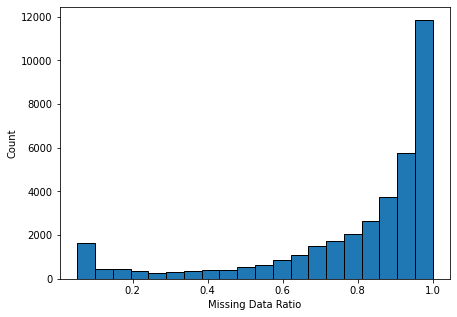

In [19]:
plt.figure(figsize=(7,5))
plt.hist(missingratio_all.values(), bins = 20, edgecolor = 'black')
plt.xlabel('Missing Data Ratio')
plt.ylabel('Count')
# plt.title('Missing Data Ratio of IoT Stations')
# plt.xticks(np.arange(0.0, 1.1, 0.1))
# plt.xlim(0.04, 1.04)
# plt.grid(True)
plt.savefig('HistMissingRatio.jpeg', dpi=300)
plt.show()

In [25]:
keys5 = list(filter(lambda x: missingratio_all[x] <= 0.055, missingratio_all))
keys6 = list(filter(lambda x: missingratio_all[x] <= 0.06, missingratio_all))
keys10 = list(filter(lambda x: missingratio_all[x] <= 0.1, missingratio_all))
keys20 = list(filter(lambda x: missingratio_all[x] <= 0.2, missingratio_all))
print(len(keys5), len(keys6), len(keys10), len(keys20))

454 842 1648 2560


In [ ]:
missingratio_sorted = sorted(missingratio_all, key = lambda x: missingratio_all[x])
missingratio_all[missingratio_sorted[1000]]